In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

from mpl_toolkits.axes_grid1 import make_axes_locatable
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.neighbors import DistanceMetric
from math import radians

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn import metrics


from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('data_features.csv', sep=',') 
df.head()

,Unnamed: 0,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,...,climat,geography,position,temp_amplitude,winddir9am_sin,winddir9am_cos,winddir3pm_sin,winddir3pm_cos,windgustdir_sin,windgustdir_cos
0,0,0.6,7.6,10.9,44.0,20.0,24.0,71.0,22.0,1007.1,...,0,0,0,9.5,1.224647e-16,-1.000000,0.382683,-0.923880,1.224647e-16,-1.000000
1,1,0.0,12.0,12.9,44.0,4.0,22.0,44.0,25.0,1007.8,...,0,0,0,17.7,9.238795e-01,-0.382683,-0.382683,-0.923880,3.826834e-01,-0.923880
2,2,0.0,8.0,8.0,46.0,19.0,26.0,38.0,30.0,1008.7,...,0,0,0,12.8,1.224647e-16,-1.000000,-0.382683,-0.923880,-3.826834e-01,-0.923880
3,3,0.0,10.0,2.2,24.0,11.0,9.0,45.0,16.0,1012.8,...,0,0,0,18.8,-7.071068e-01,0.707107,0.000000,1.000000,7.071068e-01,0.707107
4,4,1.0,4.8,6.7,41.0,7.0,20.0,82.0,33.0,1006.0,...,0,0,0,14.8,3.826834e-01,0.923880,0.707107,-0.707107,1.224647e-16,-1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72707 entries, 0 to 72706
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       72707 non-null  int64  
 1   rainfall         72707 non-null  float64
 2   evaporation      72707 non-null  float64
 3   sunshine         72707 non-null  float64
 4   windgustspeed    72707 non-null  float64
 5   windspeed9am     72707 non-null  float64
 6   windspeed3pm     72707 non-null  float64
 7   humidity9am      72707 non-null  float64
 8   humidity3pm      72707 non-null  float64
 9   pressure3pm      72707 non-null  float64
 10  cloud9am         72707 non-null  float64
 11  cloud3pm         72707 non-null  float64
 12  raintoday        72707 non-null  int64  
 13  raintomorrow     72707 non-null  int64  
 14  latitude         72707 non-null  float64
 15  longitude        72707 non-null  float64
 16  year             72707 non-null  int64  
 17  month       

In [4]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
object_df = df.select_dtypes(include=['object'])

In [5]:
for col in object_df.columns:
    le = LabelEncoder()
    object_df[col] = le.fit_transform(object_df[col].astype(str))

In [6]:
new_df = pd.concat([numeric_df, object_df], axis=1)



In [7]:
df = new_df

In [8]:
# Afficher les valeurs manquantes dans chaque colonne
print(df.isnull().sum())

Unnamed: 0         0
rainfall           0
evaporation        0
sunshine           0
windgustspeed      0
windspeed9am       0
windspeed3pm       0
humidity9am        0
humidity3pm        0
pressure3pm        0
cloud9am           0
cloud3pm           0
raintoday          0
raintomorrow       0
latitude           0
longitude          0
year               0
month              0
day                0
climat             0
geography          0
position           0
temp_amplitude     0
winddir9am_sin     0
winddir9am_cos     0
winddir3pm_sin     0
winddir3pm_cos     0
windgustdir_sin    0
windgustdir_cos    0
dtype: int64


In [9]:
# Supprimer les lignes contenant des valeurs manquantes
df = df.dropna()

In [10]:
print(df.isnull().sum())

Unnamed: 0         0
rainfall           0
evaporation        0
sunshine           0
windgustspeed      0
windspeed9am       0
windspeed3pm       0
humidity9am        0
humidity3pm        0
pressure3pm        0
cloud9am           0
cloud3pm           0
raintoday          0
raintomorrow       0
latitude           0
longitude          0
year               0
month              0
day                0
climat             0
geography          0
position           0
temp_amplitude     0
winddir9am_sin     0
winddir9am_cos     0
winddir3pm_sin     0
winddir3pm_cos     0
windgustdir_sin    0
windgustdir_cos    0
dtype: int64


##### 

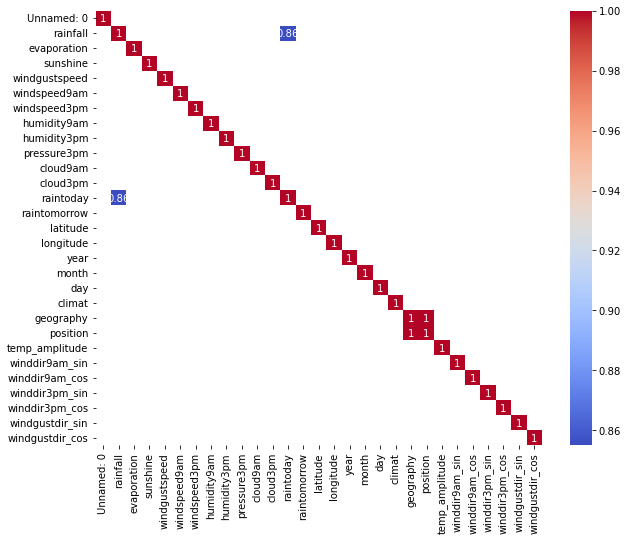

In [11]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Créer un masque pour masquer les corrélations inférieures à 0,75
mask = (corr_matrix < 0.75) & (corr_matrix > -0.75)

# Créer une nouvelle figure avec une taille de 10 x 8 pouces
plt.figure(figsize=(10, 8))

# Afficher la matrice de corrélation avec les valeurs de corrélation annotées et les valeurs de corrélation inférieures à 0,75 masquées
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')

# Afficher le graphique
plt.show()



In [13]:
features = df[["temp_amplitude","winddir9am_sin","winddir9am_cos","winddir3pm_sin",
            "windgustdir_sin","windgustdir_cos","position", "geography", "raintoday", "cloud3pm","cloud9am", "evaporation", "climat", "humidity9am", "humidity3pm", "pressure3pm"]]

target = df["raintomorrow"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [15]:
from lazypredict.Supervised import LazyClassifier

In [16]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [18:28<00:00, 38.22s/it] 

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.73               0.74     0.74      0.76   
GaussianNB                         0.81               0.71     0.71      0.82   
BernoulliNB                        0.81               0.69     0.69      0.82   
DecisionTreeClassifier             0.82               0.69     0.69      0.82   
XGBClassifier                      0.88               0.69     0.69      0.86   
LGBMClassifier                     0.88               0.69     0.69      0.87   
RandomForestClassifier             0.88               0.68     0.68      0.86   
ExtraTreesClassifier               0.88               0.67     0.67      0.86   
KNeighborsClassifier               0.87               0.67     0.67      0.85   
LinearDiscriminantAnalysis         0.87               0.67     0.67      0.86   
BaggingClassifier           

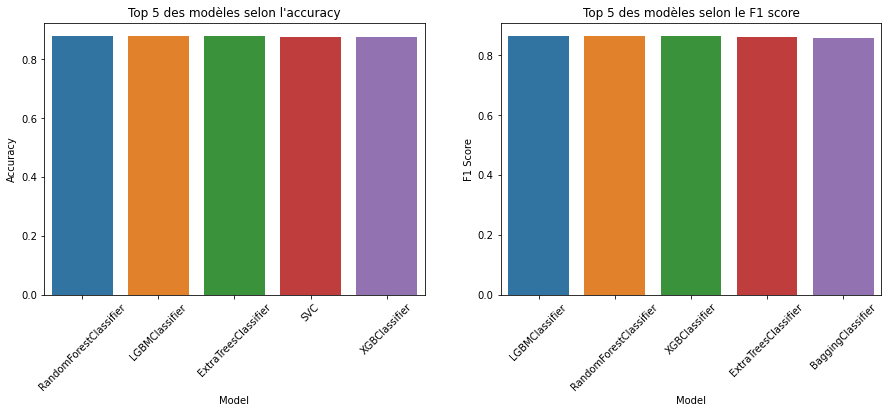

In [17]:
# Trier les modèles selon l'accuracy
top_accuracy = models.sort_values(by='Accuracy', ascending=False)[:5]

# Trier les modèles selon le F1 score
top_f1 = models.sort_values(by='F1 Score', ascending=False)[:5]

# Afficher les modèles dans un graphique en barres
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.barplot(x=top_accuracy.index, y=top_accuracy['Accuracy'], ax=ax[0])
sns.barplot(x=top_f1.index, y=top_f1['F1 Score'], ax=ax[1])
ax[0].set_xticklabels(top_accuracy.index, rotation=45)
ax[1].set_xticklabels(top_f1.index, rotation=45)
ax[0].set_title('Top 5 des modèles selon l\'accuracy')
ax[1].set_title('Top 5 des modèles selon le F1 score')
plt.show()

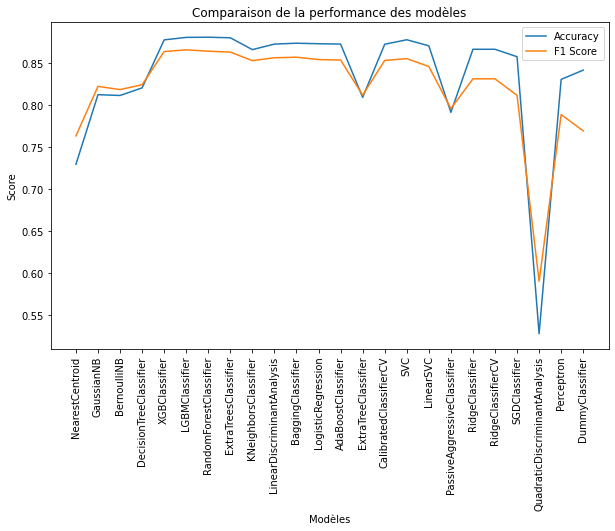

In [18]:
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(models.index, models['Accuracy'], label='Accuracy')
plt.plot(models.index, models['F1 Score'], label='F1 Score')

# Configuration du graphique
plt.title('Comparaison de la performance des modèles')
plt.xlabel('Modèles')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()

# Affichage du graphique
plt.show()
